In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
from IPython.html import widgets 
from IPython.html.widgets import *
import numpy as np
plt.style.use('ggplot')


<IPython.core.display.Javascript object>


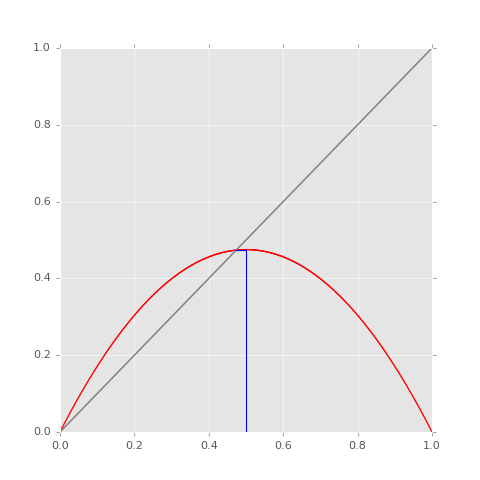

<function __main__.plot_VH>

In [7]:
# Logistic equation
def logistic_map(x,r):
    return x*r*(1.0-x)

# Calculate points for Verhaulst diagram
def get_VH_points(r, x=0.5, n=100):
    # Points will be stored in tuple
    
    # Initialization and first point 
    VH_points  = [(x,0)]
    for i in range(n):
        y1 = logistic_map(x,r)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = logistic_map(y1,r)
        VH_points.append((y1,y2))
        x = y1
    return zip(*VH_points)

# Calculate y-points from from logistic equation for x in range(0,1)
def get_function_points(r, n =1000):
    x_vals = np.linspace(0,1,n)
    y_vals = [logistic_map(x,r) for x in x_vals]
    return x_vals, y_vals


# Plotting VerhaulsteŮv diagram 
def plot_VH(r, function_n = 1000, VH_n = 100, VH_x = 0.5):
    func_x_vals, func_y_vals = get_function_points(r=r, n=function_n)
    VH_x_vals, VH_y_vals = get_VH_points(r=r, x = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    
    plt.show()
    
interact(plot_VH, r=(1.0,3.0,0.1))    